### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import datetime
import plotly.graph_objects as go

# import to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import yfinance as yf
import datetime as dt

ticker = 'POWERGRID.NS'
# Download historical data from Yahoo Finance
df = yf.download(ticker, start='2020-01-01', end=datetime.datetime.today().strftime('%Y-%m-%d'))
# Focus on 'Close' prices for simplicity
data = df[['Close']]

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2020-01-01,80.429741,80.594302,78.269858,78.393283,13620373
2020-01-02,80.265182,80.923432,79.956629,80.450317,5673692
2020-01-03,79.401230,80.141757,78.681265,79.915486,7358268
2020-01-06,79.442352,79.792048,77.344185,78.989811,7355290
2020-01-07,78.866394,80.018332,78.640123,79.462934,14023712


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2025-09-01,279.850006,280.600006,276.000000,276.000000,10820878
2025-09-02,286.700012,287.899994,279.850006,280.200012,16983677
2025-09-03,286.049988,289.200012,285.600006,289.000000,30178885
2025-09-04,281.799988,287.950012,280.899994,286.850006,5946090
2025-09-05,285.350006,286.649994,282.350006,282.350006,9695914


In [5]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,1409.000000,1409.000000,1409.000000,1409.000000,1.409000e+03
mean,174.002919,176.173713,171.852963,174.040661,1.719982e+07
std,85.734567,86.674135,84.717572,85.730148,1.362417e+07
min,61.486694,64.792430,52.102666,60.377647,0.000000e+00
25%,104.266541,105.543381,103.468528,104.544431,9.900390e+06
50%,146.498123,147.890041,144.999817,146.356299,1.371025e+07
75%,266.149231,270.679661,262.465172,267.603743,2.016297e+07
max,354.580750,355.356950,346.576122,353.222365,2.260593e+08


In [6]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [7]:
df = df.reset_index()

In [8]:
df.to_csv("powergrid.csv")

In [9]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2020-01-01,80.429741,80.594302,78.269858,78.393283,13620373
1,2020-01-02,80.265182,80.923432,79.956629,80.450317,5673692
2,2020-01-03,79.401230,80.141757,78.681265,79.915486,7358268
3,2020-01-06,79.442352,79.792048,77.344185,78.989811,7355290
4,2020-01-07,78.866394,80.018332,78.640123,79.462934,14023712


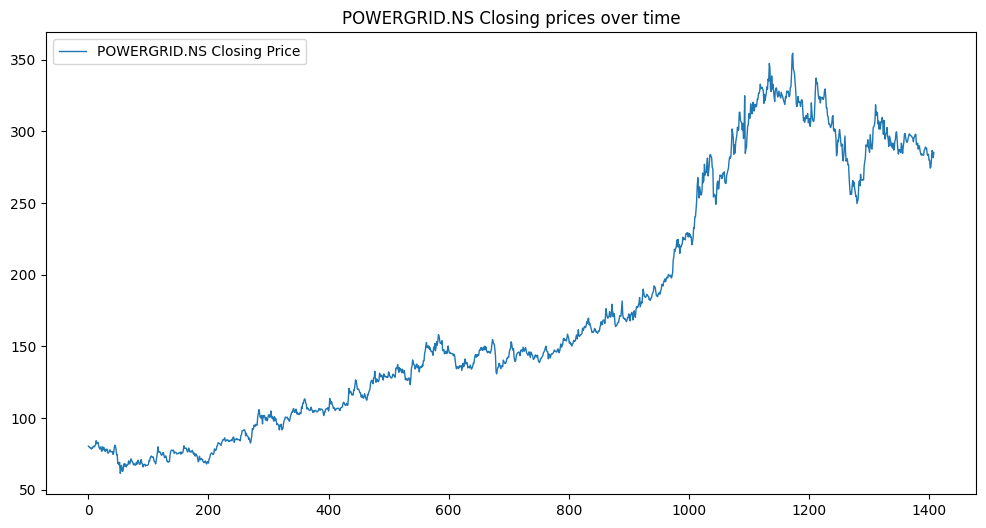

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{ticker} Closing Price', linewidth = 1)
plt.title(f'{ticker} Closing prices over time')
plt.legend()
plt.show()

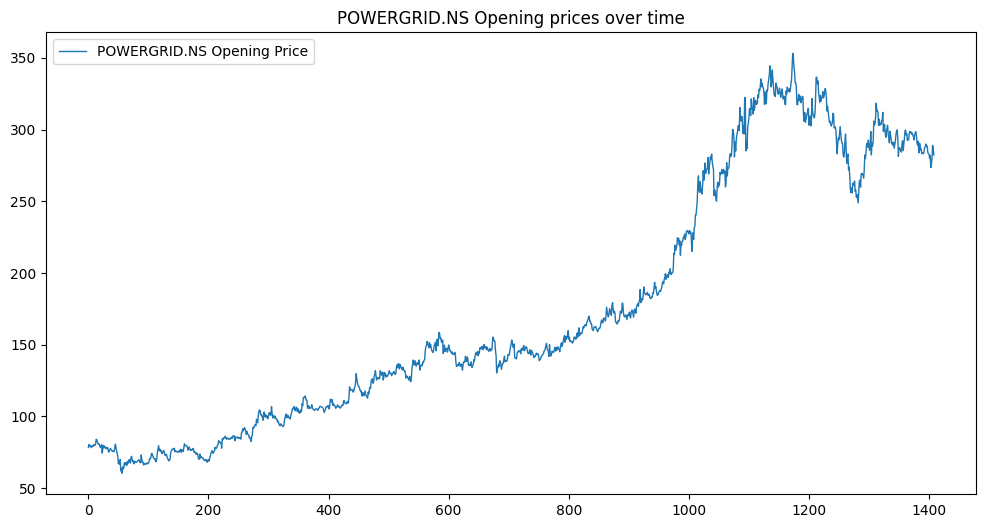

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{ticker} Opening Price', linewidth = 1)
plt.title(f'{ticker} Opening prices over time')
plt.legend()
plt.show()

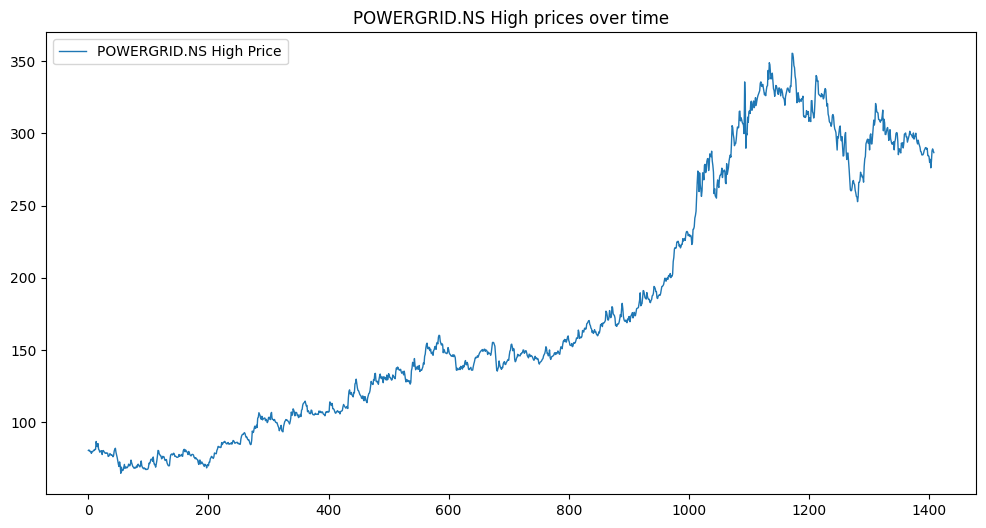

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{ticker} High Price', linewidth = 1)
plt.title(f'{ticker} High prices over time')
plt.legend()
plt.show()

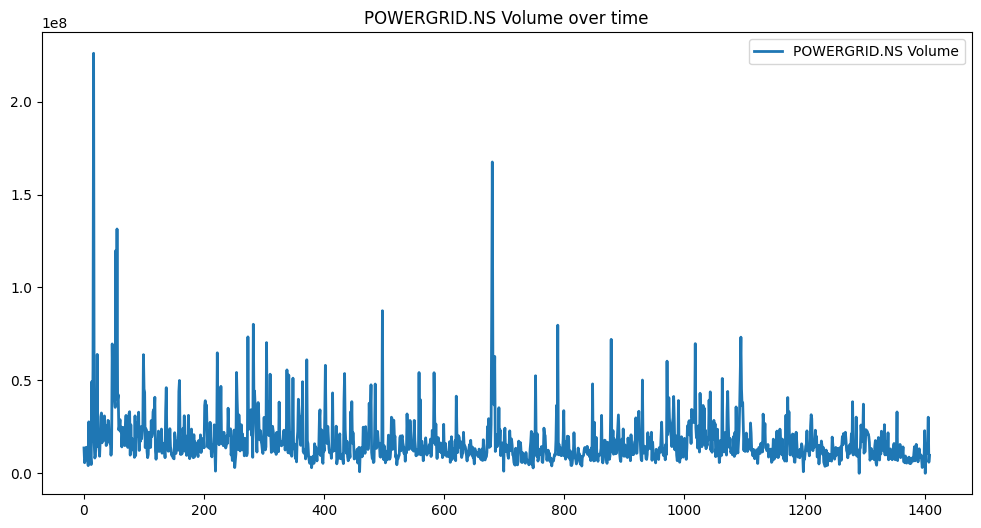

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{ticker} Volume', linewidth = 2)
plt.title(f'{ticker} Volume over time')
plt.legend()
plt.show()

In [14]:
df['MA_5'] = df['Close'].rolling(window=5).mean()   # 5-day moving average
df['MA_20'] = df['Close'].rolling(window=20).mean() # 20-day moving average
df['MA_50'] = df['Close'].rolling(window=50).mean()

In [15]:
ma100 = df.Close.rolling(100).mean()

In [16]:
ma200 = df.Close.rolling(200).mean()

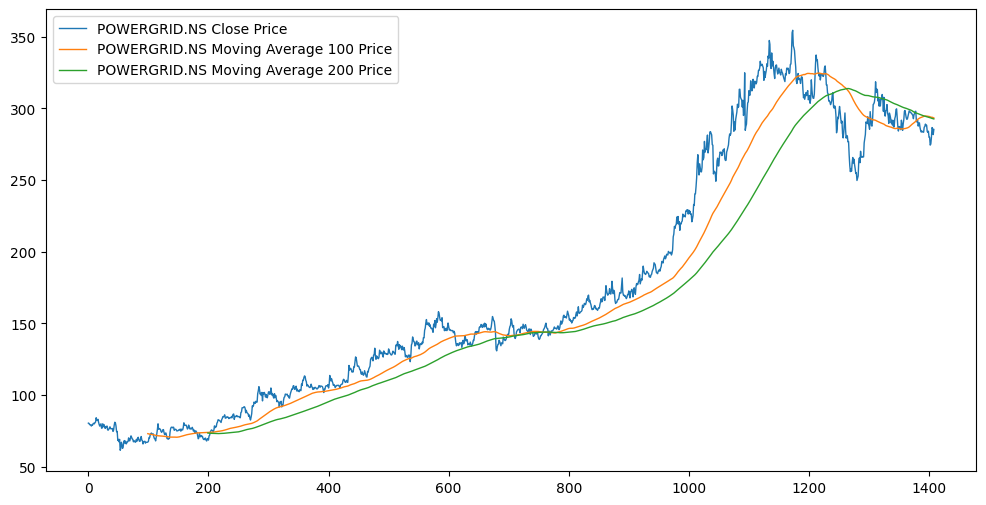

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{ticker} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{ticker} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{ticker} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [18]:
#exponential moving average
ema100 = df.Close.ewm(span=100, adjust = False).mean()
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

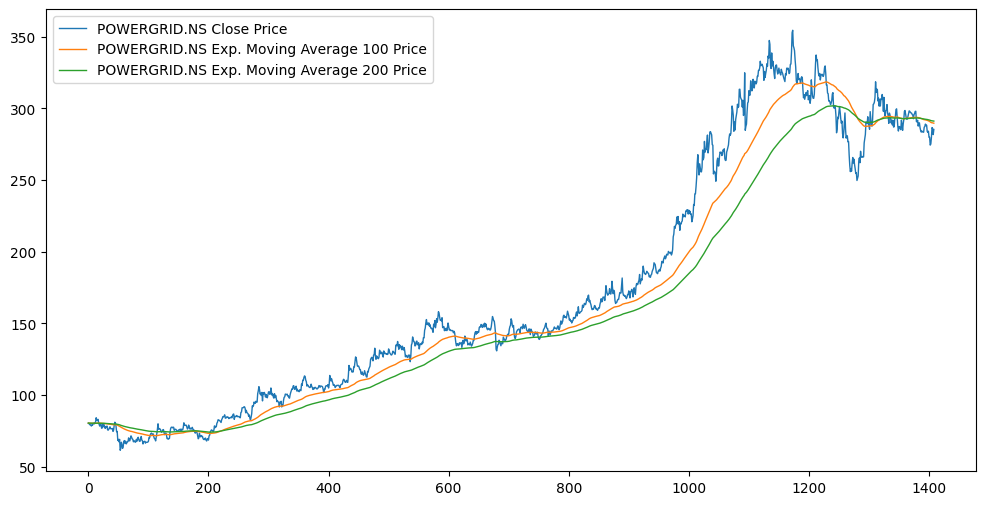

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{ticker} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{ticker} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{ticker} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [20]:
df1=data.reset_index()['Close']

In [21]:
df1

Ticker,POWERGRID.NS
0,80.429741
1,80.265182
2,79.401230
3,79.442352
4,78.866394
...,...
1404,279.850006
1405,286.700012
1406,286.049988
1407,281.799988


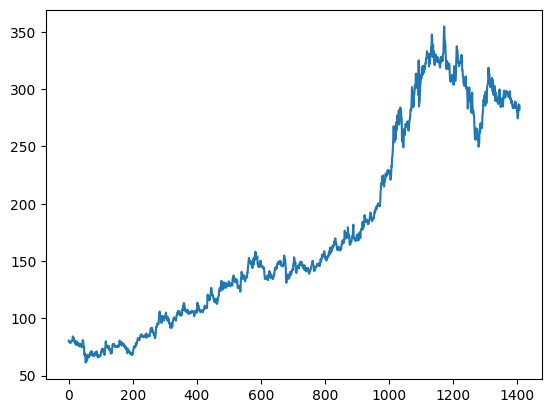

In [22]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [23]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [24]:
import numpy as np

In [25]:
df1

Ticker,POWERGRID.NS
0,80.429741
1,80.265182
2,79.401230
3,79.442352
4,78.866394
...,...
1404,279.850006
1405,286.700012
1406,286.049988
1407,281.799988


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
print(df1)

[[0.06463129]
 [0.06406984]
 [0.06112214]
 ...
 [0.76618167]
 [0.75168121]
 [0.76379342]]


In [28]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [29]:
training_size,test_size

(915, 494)

In [30]:
train_data

array([[0.06463129],
       [0.06406984],
       [0.06112214],
       [0.06126244],
       [0.05929735],
       [0.05768314],
       [0.06105193],
       [0.059929  ],
       [0.06364869],
       [0.0642804 ],
       [0.06287673],
       [0.06596476],
       [0.06729825],
       [0.07747481],
       [0.07178992],
       [0.07101793],
       [0.07368486],
       [0.06666662],
       [0.06112214],
       [0.05754276],
       [0.06027992],
       [0.06308724],
       [0.05248955],
       [0.05319139],
       [0.06301706],
       [0.05599878],
       [0.06098176],
       [0.05747258],
       [0.05213869],
       [0.05620929],
       [0.05599878],
       [0.05768314],
       [0.04862949],
       [0.04792765],
       [0.04989283],
       [0.05340195],
       [0.05585837],
       [0.05143685],
       [0.05150708],
       [0.05108591],
       [0.0519281 ],
       [0.04498001],
       [0.04778735],
       [0.05929735],
       [0.06680692],
       [0.06526292],
       [0.05775329],
       [0.044

In [31]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [32]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [33]:
print(X_train.shape), print(y_train.shape)

(814, 100)
(814,)


(None, None)

In [34]:
print(X_test.shape), print(ytest.shape)

(393, 100)
(393,)


(None, None)

In [35]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - loss: 0.0123 - val_loss: 0.1482
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - loss: 0.0025 - val_loss: 0.0376
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 7.0280e-04 - val_loss: 0.0045
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 3.4099e-04 - val_loss: 0.0029
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 2.9423e-04 - val_loss: 0.0068
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 2.7932e-04 - val_loss: 0.0065
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 2.8279e-04 - val_loss: 0.0061
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 2.7885e-04 - val_loss: 0.0080
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 2.6471e-04 - val_loss: 0.0093
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 2.6438e-04 - val_loss: 0.0091
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 2.5765e-04 - val_loss: 0.0092
Epoc

In [41]:
import tensorflow as tf

In [42]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [43]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [44]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

125.61983375808303

In [45]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

288.76344328051044

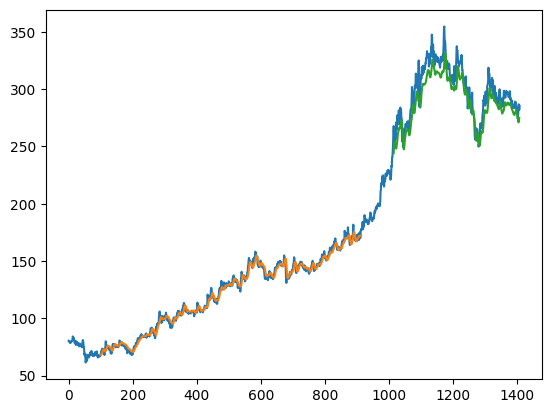

In [46]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [47]:
len(test_data)

494

In [48]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 153)

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [50]:
temp_input

[0.7539368057786952,
 0.7436951445558806,
 0.756791001681989,
 0.7819754384218583,
 0.8031302445016746,
 0.7635068792451896,
 0.7431914016775741,
 0.7494035363624684,
 0.7478926200939473,
 0.7342930200895326,
 0.7351422402043459,
 0.7030388877423885,
 0.6784093178480122,
 0.6634616485907173,
 0.6705957847612262,
 0.6644809001483324,
 0.6843543792623696,
 0.697093826328031,
 0.6838447014224958,
 0.6930172365861018,
 0.6799380390012355,
 0.6705957847612262,
 0.6590453603906496,
 0.6607439047424092,
 0.6423991467815953,
 0.6480044576767479,
 0.6531002469152256,
 0.6884309690042988,
 0.6960746788925487,
 0.6846940256594419,
 0.7118715682646568,
 0.6982827969620494,
 0.6976034000457721,
 0.6994718717182006,
 0.6984527242827183,
 0.6984527242827183,
 0.731914974699363,
 0.7426161268940598,
 0.7519583811340691,
 0.7816837923279898,
 0.778796173220079,
 0.7782865995023379,
 0.7940834888744461,
 0.7765879510284456,
 0.7730208308821248,
 0.7643580776805254,
 0.8063133622223662,
 0.78864789705569

In [51]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=152
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.74369514 0.756791   0.78197544 0.80313024 0.76350688 0.7431914
 0.74940354 0.74789262 0.73429302 0.73514224 0.70303889 0.67840932
 0.66346165 0.67059578 0.6644809  0.68435438 0.69709383 0.6838447
 0.69301724 0.67993804 0.67059578 0.65904536 0.6607439  0.64239915
 0.64800446 0.65310025 0.68843097 0.69607468 0.68469403 0.71187157
 0.6982828  0.6976034  0.69947187 0.69845272 0.69845272 0.73191497
 0.74261613 0.75195838 0.78168379 0.77879617 0.7782866  0.79408349
 0.77658795 0.77302083 0.76435808 0.80631336 0.7886479  0.77336058
 0.77183196 0.78694935 0.82329933 0.82482794 0.82890464 0.83994544
 0.87731456 0.85200538 0.86015877 0.85829019 0.83145251 0.83841671
 0.81939256 0.83467988 0.81973221 0.83722774 0.83518945 0.84707957
 0.83739757 0.80699276 0.84011526 0.80410524 0.79561221 0.80818173
 0.81005031 0.8231294  0.80223667 0.79629161 0.77845642 0.80291617
 0.79816008 0.79085612 0.77930564 0.78593021 0.77454966 0.78576028
 0.76945381 0.77047296 0.78983697 0.79510253 0.81106

In [52]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [53]:
import matplotlib.pyplot as plt

In [54]:
len(df1)

1409

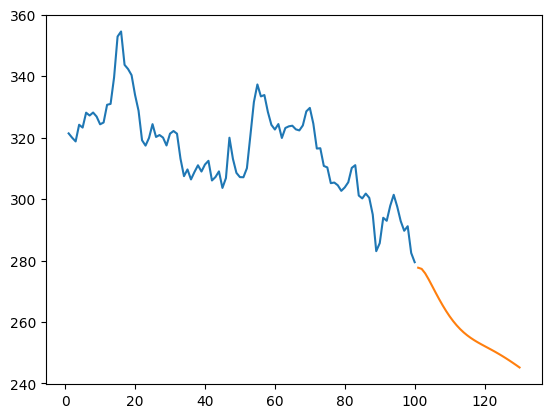

In [55]:
# Make sure lengths match
plt.plot(day_new, scaler.inverse_transform(df1[1158:1158+len(day_new)]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))


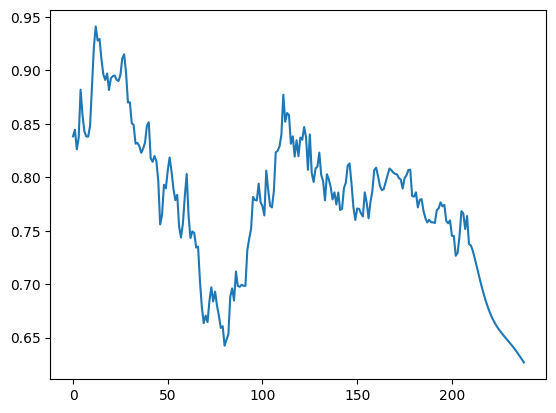

In [56]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [57]:
df3=scaler.inverse_transform(df3).tolist()

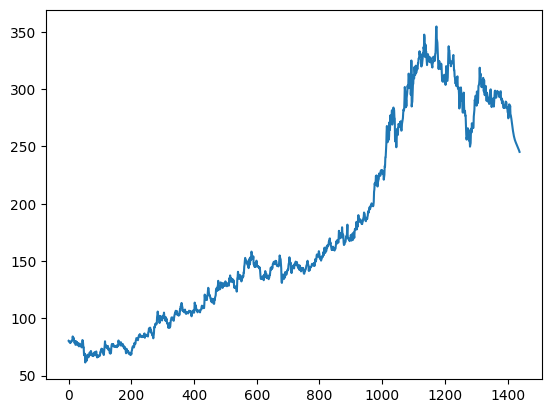

In [58]:
plt.plot(df3)

In [59]:
model.save('stock_dl_model.h5')